# Analysis of domains and PDF separation

In [1]:
import json
from urllib.parse import urlparse, urlunparse
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

In [2]:
# Input file with URLs
pdf_file = "pdf_urls.json"
non_pdf_file = "non_pdf_urls.json"
output_file = "prefix_counts.json"

with open(pdf_file, "r") as file:
    pdf_urls = json.load(file)

with open(non_pdf_file, "r") as file:
    non_pdf_urls = json.load(file)

urls = pdf_urls + non_pdf_urls
# Extract prefixes and count their occurrences
prefix_counts = {}
for url in urls:
    # Parse the URL to extract the scheme and netloc
    parsed_url = urlparse(url)
    prefix = f"{parsed_url.scheme}://{parsed_url.netloc}"
    prefix_counts[prefix] = prefix_counts.get(prefix, 0) + 1

# Calculate the total count
total_count = sum(prefix_counts.values())

# Sort prefixes by counts in descending order
sorted_prefix_counts = sorted(prefix_counts.items(), key=lambda x: x[1], reverse=True)

# Convert to a dictionary for saving (optional, as JSON supports list of tuples)
sorted_prefix_counts_dict = {k: v for k, v in sorted_prefix_counts}

# Save the sorted counts to a JSON file
with open(output_file, "w") as file:
    json.dump(sorted_prefix_counts_dict, file, indent=4)

# Print the total count and save confirmation
print(f"Total number of URLs: {total_count}")
print(f"Sorted prefix counts saved to {output_file}")

Total number of URLs: 1803
Sorted prefix counts saved to prefix_counts.json


In [3]:
def normalize_url(url: str) -> str:
    """Normalize URL by converting http to https and removing trailing slashes."""
    parsed_url = urlparse(url)
    normalized = urlunparse(("https",) + parsed_url[1:])
    return normalized.rstrip("/")

# Load URLs from non_pdf_urls.json
input_file = "pdf_urls.json"
output_file = "unique_pdf_urls.json"

with open(input_file, 'r', encoding='utf-8') as f:
    urls = json.load(f)

# Normalize and remove duplicates using a set
unique_urls = {normalize_url(url) for url in urls}

# Save the cleaned URLs back to a new JSON file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(sorted(unique_urls), f, indent=2)

print(f"Collected {len(unique_urls)} unique URLs and saved to {output_file}.")


Collected 135 unique URLs and saved to unique_pdf_urls.json.


In [2]:
def load_data(filename):
    with open(filename, 'r') as file:
        return json.load(file)

def plot_pie_chart(data):
    # sort domains by count in descending order
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    total_count = sum(count for _, count in sorted_data)
    
    # separate domains above and below 2%
    significant_data = [(domain, count) for domain, count in sorted_data if (count / total_count * 100) > 2]
    other_count = sum(count for _, count in sorted_data if (count / total_count * 100) <= 2)
    
    # sreate labels and values
    labels = [domain for domain, _ in significant_data] + ["Others"]
    values = [count for _, count in significant_data] + [other_count]
    
    # generate legend labels
    legend_labels = [f"{domain} ({count / total_count * 100:.1f}%)" for domain, count in significant_data] + [f"Others ({other_count / total_count * 100:.1f}%)"]
    
    # plot pie chart without labels
    plt.figure(figsize=(10, 6))
    wedges, _, autotexts = plt.pie(
        values,
        autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
        startangle=140,
        wedgeprops={"edgecolor": "black"},
        pctdistance=0.85
    )
    
    # add legend for domains above 2% and "Others"
    plt.legend(wedges, legend_labels, title="Domains", loc="best", bbox_to_anchor=(1, 1))
    plt.title("Domain Distribution")
    plt.show()


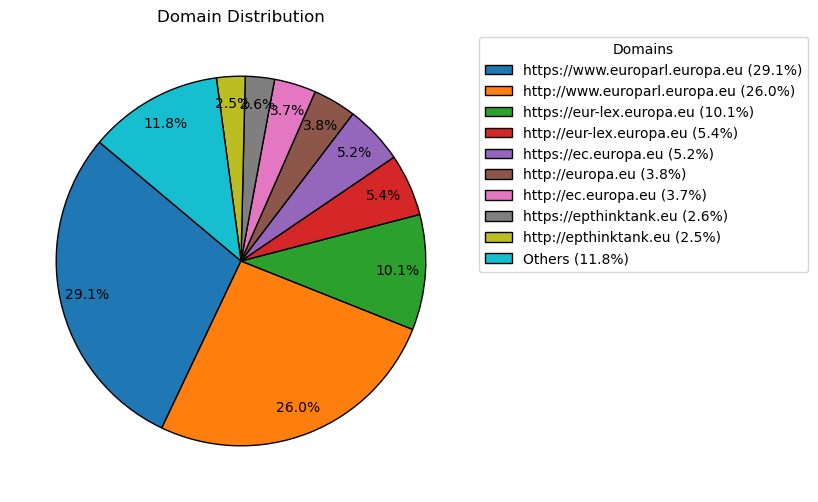

In [3]:
filename = "prefix_counts.json"
data = load_data(filename)
plot_pie_chart(data)